<a href="https://colab.research.google.com/github/TrzeciakPiotr2300/Uczenie_Maszynowe_2025/blob/main/HW07_gradient-boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment: Understanding Binary Cross-Entropy in the Forward Stagewise Procedure
-----------------------------

## The Problem

In this assignment, you will demonstrate that adding a new constant predictor in the forward stagewise procedure to an already existing predictor from a previous stage, $f_{m-1}(x_i)$ (which we will denote as $f_i$ for ease of notation), may be for certain loss functions fundamentally more challenging than building a constant predictor from scratch. You will work with the binary cross-entropy loss defined as

$$
L(y, z) = -y \log(\sigma(z)) - (1 - y) \log(1 - \sigma(z)),
$$

where

- $y_i \in \{0,1\}$ are the binary labels,
- $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the sigmoid function.

For the purposes of this assignment, assume that you are given:

- A dataset of binary labels $y_i$.
- **Two constants: $m$ (the number of ones) and $k$ (the number of zeros)** in the labels in the dataset.
- A set of predictions $f_i = f_{m-1}(x_i)$ obtained from a previous stage, where the $f_i$ values are generated randomly from a normal distribution.

### The assignment will explore two scenarios:

### Scenario A: Fitting a Constant Predictor from Scratch

In this scenario, you are building a predictor from scratch. The task is to find the optimal constant value $\lambda$ that minimizes the binary cross-entropy loss over the dataset. Formulate the optimization problem as:

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda).
$$



### Scenario B: Fitting the m-th Predictor in the Forward Stagewise Procedure

Now assume you already have an existing predictor $f_i = f_{m-1}(x_i)$. Rather than predicting from scratch, you wish to find an optimal additive correction $\lambda$ such that the updated prediction for each data point becomes

$$
 f_i + \lambda,
$$

and the corresponding binary cross-entropy loss is given by

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
$$


## Research Questions

In this assignment you will answer the following questions:

- Why is finding an optimal additive shift $\lambda$ in the forward stagewise procedure fundamentally harder than directly fitting a single-parameter predictor from scratch?
- How does the complexity of the loss landscape differ between these two scenarios? Discuss the differences in the shape and smoothness of the loss function in both cases.

## Tasks & Deliverables

1. **Derivation and Analysis**

  **Scenario A:**
  - Derive explicitly the optimal $\lambda$ for fitting from scratch, i.e., solve
    
    $$
    \lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda)
    $$
    
    and express the answer in terms of $m$ and $k$.
    *Hint:* First, write the derivative of the loss with respect to $\lambda$ and set it to zero to obtain an implicit equation.

  - **Interpretation:**
  Provide a clear interpretation of your derived optimal $\lambda$. What does this constant represent in terms of the dataset's label distribution?

  **Scenario B:**
  - Derive the implicit equation that $\lambda$ must satisfy in the additive shift scenario:
    
    $$
    \lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
    $$
    *Hint:* First, write the derivative of the loss with respect to $\lambda$ and set it to zero to obtain an implicit equation.

  - **Discussion:**
    Explain clearly why this implicit equation has no simple closed-form solution, unlike the previous case. What role does the non-linearity of the sigmoid function (in the binary cross-entropy loss) play in this difficulty?

2. **Loss Landscape Exploration (Python)**

  Write a Python code that:

  - Uses provided values for $n$, and for $k$ and $m$ (the number of zeros and ones in the labels, respectively), $k+m=n$.
  - Generates a set of predictions $f_i$ by sampling from a normal distribution.
  - Plots the binary cross-entropy loss as a function of $\lambda$ for:
    - Scenario A:
      $$
      \text{plot } \sum_{i=1}^{n} L(y_i, \lambda) \text{ as a function of }\lambda
      $$
    - Scenario B:
      $$
      \text{plot } \sum_{i=1}^{n} L(y_i, f_i + \lambda) \text{ as a function of }\lambda
      $$
  - **Discussion:**
  Is the loss landscape in Scenario A simpler or more complex than in Scenario B? Is it multimodal or unimodal? If so, is it thinkable the lambda minimizer in Scenario B can be found numerically? Where does the difficulty in Scenario B come from: the non-linearity of the problem or a complex loss landscape?
--------------------------------



------------------
# **Answers**
------------------

## *Scenario A*

1. **Derivation:**

The binary cross-entropy loss for a constant predictor $\lambda$ is:

$$
L(y_i, \lambda) = -y_i \log(\sigma(\lambda)) - (1 - y_i) \log(1 - \sigma(\lambda))
$$

Summing over all data points:

$$
\sum_{i=1}^n L(y_i, \lambda) = -\sum_{i=1}^n \left[ y_i \log(\sigma(\lambda)) + (1 - y_i) \log(1 - \sigma(\lambda)) \right]
$$

Taking the derivative with respect to $\lambda$ and setting it to zero:

$$
\frac{d}{d\lambda} \sum_{i=1}^n L(y_i, \lambda) = \sum_{i=1}^n \frac{e^\lambda(y_{i}-1) + y_{i}}{e^\lambda + 1} = 0.
$$

Solving for $\lambda$:

$$
e^\lambda = \frac{\sum y_{i}}{\sum \left(1-y_{i}\right)} = \frac{m}{k},
$$

what gives us

$$
\lambda^* = \log\left(\frac{m}{k}\right)
$$

where $m$ is the number of ones and $k$ is the number of zeros in the labels.


## *Scenario B*

1. **Derivation:**

Now we consider a case where each prediction is of the form $f_i + \lambda$, where $f_i$ is fixed and only $\lambda$ is optimized. The binary cross-entropy loss becomes:

$$
L(y_i, f_i + \lambda) = -y_i \log(\sigma(f_i + \lambda)) - (1 - y_i) \log(1 - \sigma(f_i + \lambda))
$$

After shifting $\sigma$ argument, we analogously obtain:

$$
\sum_{i=1}^n \left( e^{(f_{i}+\lambda)}(y_{i}-1) + y_{i} \right)= 0
$$

and

$$
\sum_{i=1}^n e^{(f_{i}+\lambda)}(1-y_{i}) = m,
$$

which is non-linear, and cannot be solved explicite (at least in general case) and has to be solved numerically. That's why it's harder and more computationally challanging.

------------------------

# **Code visualisation**
------------------------

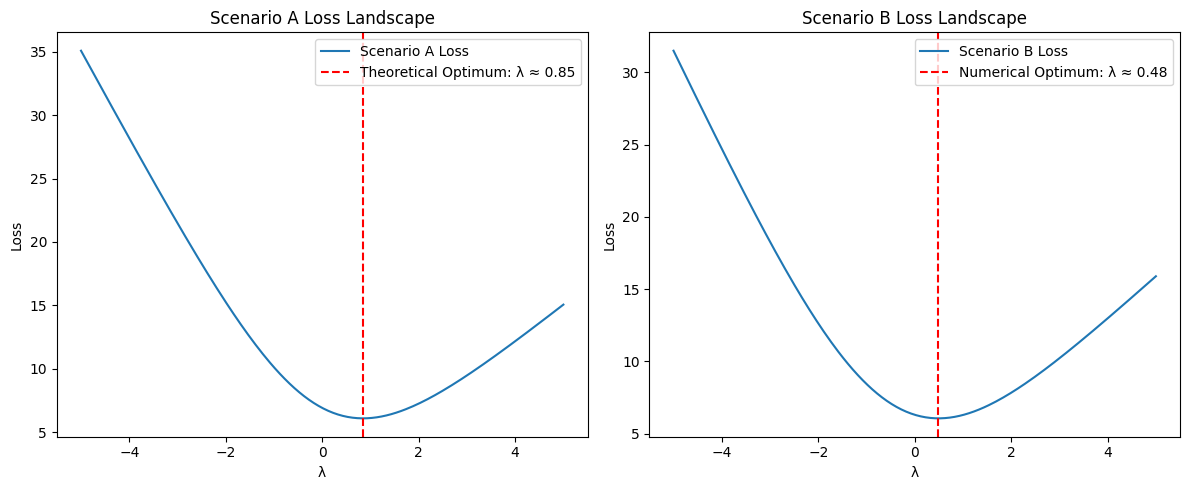

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
m, k = 7, 3 # number of ones and zeros
n = m + k
y = np.concatenate([np.ones(m), np.zeros(k)])
np.random.seed(42)
f = np.random.randn(n) # I chose randn, can be different.

# Sigmoid and loss
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Lambda values to evaluate
lambda_vals = np.linspace(-5, 5, 200)

# Loss for Scenario A (no previous model, constant prediction)
loss_A = [m * np.log(1 + np.exp(-l)) + k * np.log(1 + np.exp(l)) for l in lambda_vals]

# Loss for Scenario B (additive shift to previous predictions)
loss_B = [np.sum(-y * np.log(sigmoid(f + l) + 1e-9) - (1 - y) * np.log(1 - sigmoid(f + l) + 1e-9)) for l in lambda_vals]

# Find minima
lambda_A_opt = np.log(m / k)
min_idx_B = np.argmin(loss_B)
lambda_B_opt = lambda_vals[min_idx_B]

# Plotting
plt.figure(figsize=(12, 5))

# Scenario A plot
plt.subplot(1, 2, 1)
plt.plot(lambda_vals, loss_A, label='Scenario A Loss')
plt.axvline(lambda_A_opt, color='r', linestyle='--', label=f'Theoretical Optimum: λ ≈ {lambda_A_opt:.2f}')
plt.title('Scenario A Loss Landscape')
plt.xlabel('λ')
plt.ylabel('Loss')
plt.legend()

# Scenario B plot
plt.subplot(1, 2, 2)
plt.plot(lambda_vals, loss_B, label='Scenario B Loss')
plt.axvline(lambda_B_opt, color='r', linestyle='--', label=f'Numerical Optimum: λ ≈ {lambda_B_opt:.2f}')
plt.title('Scenario B Loss Landscape')
plt.xlabel('λ')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# **Summary**

As we can see both functions are convex (as they should be) and have close zeros. That means that both methods might be simmilar in use and can give simmilar results, but are not identical.